# Textures, Vertical Exaggeration, Bathymetry

Welcome to this notebook on **Textures, Vertical Exaggeration, and Bathymetry**! In this tutorial, we will explore different ways to enhance and customise your visualisation of the Earth. We will cover techniques to:

- **Change ocean colour and texture** for a more realistic appearance.
- **Exaggerate the height of mountains** using vertical exaggeration to emphasise topography.
- **View the ocean floor (Bathymetry)** to visualise underwater features.
- **Use a custom elevation map** for unique terrain effects.

By the end of this notebook, you will have learned how to make your visualisations more dynamic and informative, with a focus on customising the Earth's surface and topography.

## Initial Setup

In this notebook, we’ll be importing **accessvis** for visualisation, along with some additional Python utilities. We will use **NumPy** for array manipulation and numerical operations.

In [1]:
import datetime
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import accessvis

accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

As a reference, below is an image of the Earth without any adjustments. 

By default, the visualisation uses the **'Blue Marble'** texture, which provides a realistic representation of the planet's surface. This serves as the base texture before any customisations or enhancements are applied.

lv.translation(0.0, 0.0, -22.05)
lv.rotation(0.0, 0.0, 0.0)



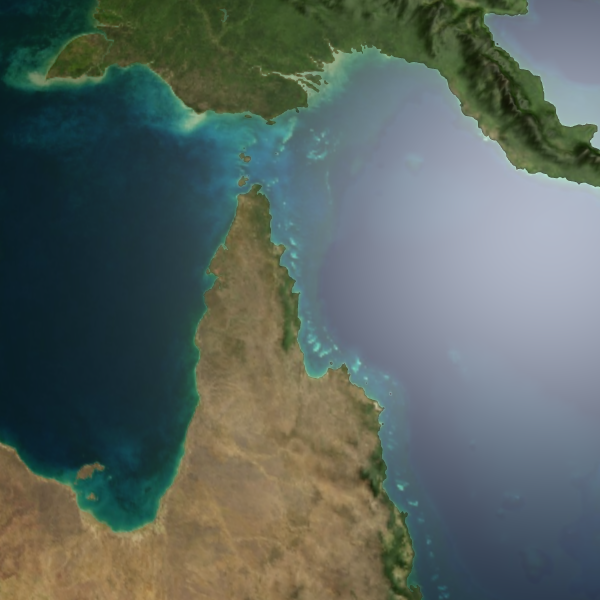

In [2]:
lv = accessvis.plot_earth(waves=False, lighting=True)
lv.camera({'translate': [0.486, -0.75, -7.878],
 'rotate': [-0.086, -0.946, 0.149, 0.274],
 'xyzrotate': [-157.759, -29.523, 163.674],
 'fov': 45.0})
lv.display(resolution=(600,600))

## Ocean Colour

The ocean's colour can be customised to any hue using RGBA values, where each component (Red, Green, Blue, and Alpha for transparency) ranges from 0 to 1. However, it is important to note that when a custom ocean colour is set, the wave texture will no longer be applied.


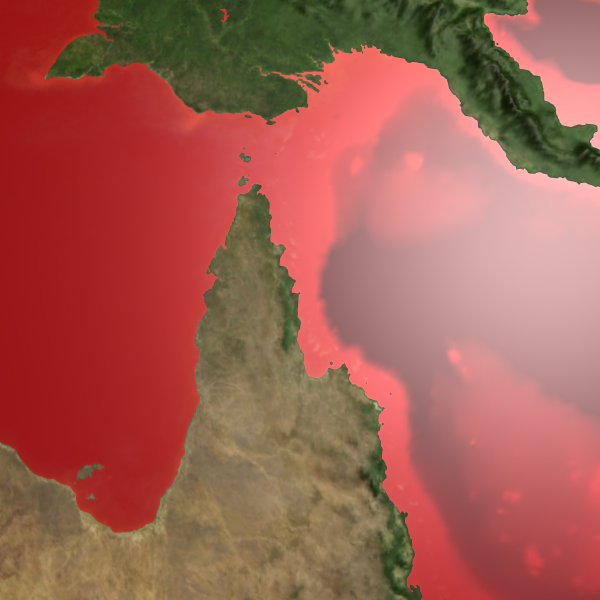

In [3]:
accessvis.update_earth_values(lv, ocean=[0.9, 0.1, 0.1, 1.0], waves=False)
lv.display(resolution=(600,600))

## Ocean Texture

When applying an ocean texture, the surface no longer appears as a solid colour. Instead, it takes on a dynamic wave pattern, giving a more realistic representation of the ocean’s surface.


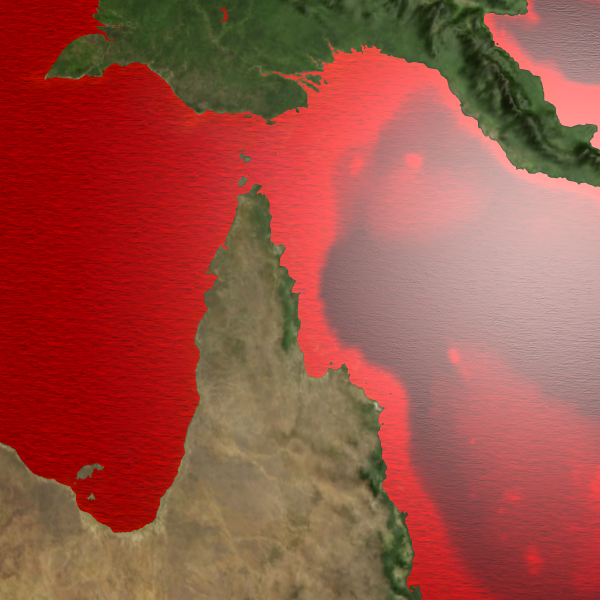

In [4]:
accessvis.update_earth_values(lv,  waves=True, texture='relief')
lv.display(resolution=(600,600))

# Mountain Height Exaggeration

In this example, we are increasing the vertical exaggeration to emphasise the effect. A significantly large value has been chosen to clearly demonstrate the change. Notice how New Zealand and Indonesia now appear with dramatically exaggerated mountain heights, creating a much spikier landscape.


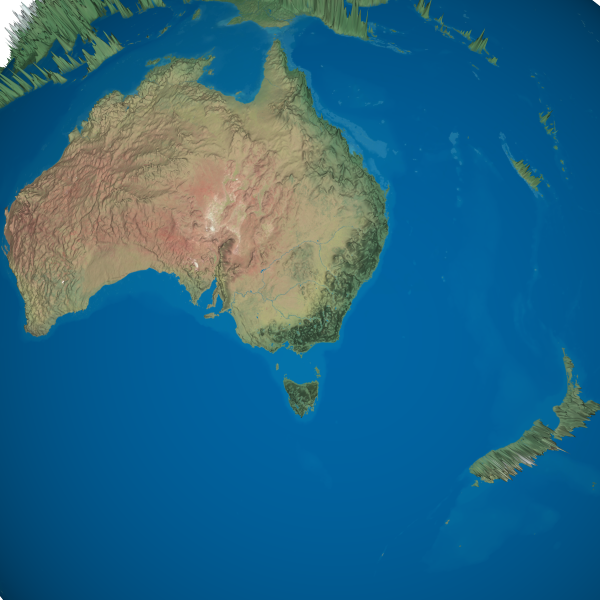

In [5]:
lv = accessvis.plot_earth(lighting=False, texture='relief', background="white", vertical_exaggeration=200)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
lv.display(resolution=(600,600))

## Bathymetry/Ocean Floor

In this visualisation, we have removed the ocean surface to reveal the ocean floor. The bathymetry data used here is from the **GEBCO (General Bathymetric Chart of the Oceans)** dataset, which provides detailed global ocean depth measurements. GEBCO offers a high-resolution map of the ocean floor, including features such as ridges, valleys, and underwater mountains. This dataset is widely used for marine and environmental studies, and its data is sourced from a combination of ship-based surveys and satellite altimetry. You can explore the seabed in great detail, revealing topographical features that are typically hidden beneath the ocean's surface.

For more information or to access the dataset, visit the [GEBCO website](https://www.gebco.net/).


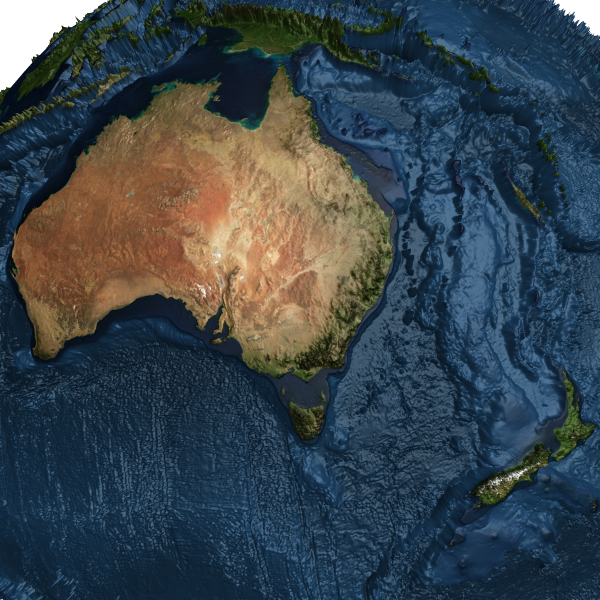

In [6]:
lv = accessvis.plot_earth(lighting=True,  background="white", bathymetry=True, vertical_exaggeration = 50)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
accessvis.update_earth_values(lv, ocean=[0.3, 0.7, 1, 1.0], )
lv.display(resolution=(600,600))

## Accessing Elevation Data

If you need to access the raw elevation data directly, you can use the `load_topography()` function. It’s important to note that the data provided is formatted with a 180-degree shift, meaning the longitude values are displaced by 180 degrees. To align it properly with the global map, you'll need to "roll" the data, effectively shifting it to the correct longitude range.

This can be easily done using a simple data manipulation step after loading the data, ensuring that it matches the Earth’s expected orientation for visualisation.

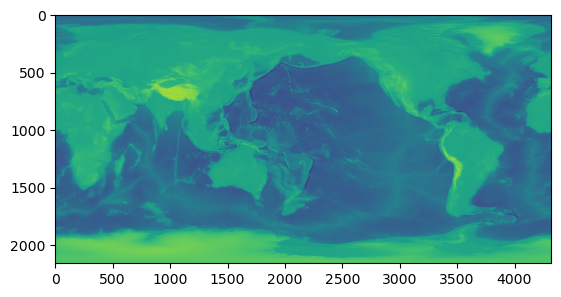

In [7]:
arr = accessvis.load_topography(subsample=5)
arr = np.roll(arr, arr.shape[1] // 2, axis=1) # The data is formatted 180 degrees off. This rotates it.
plt.imshow(arr)

We can choose a colourscheme and change the colour based on elevation. 

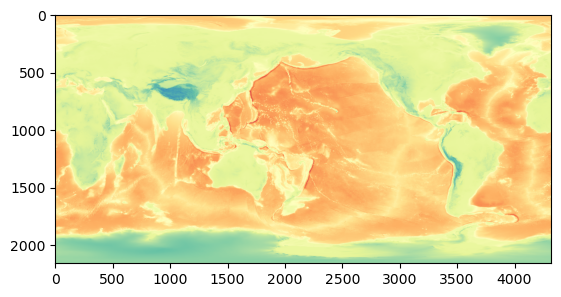

In [8]:
colours = accessvis.array_to_rgba(arr, colourmap='Spectral')
plt.imshow(colours)

Overlaying these colours onto the Earth:


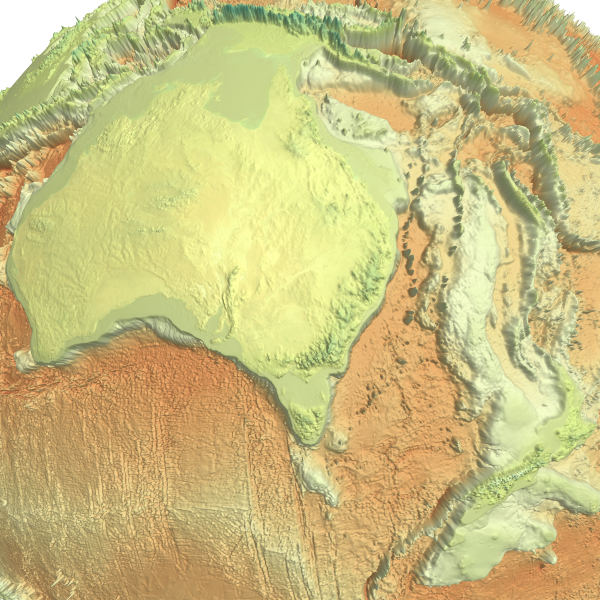

In [9]:
accessvis.update_earth_values(lv, dataMode=0, dataAlpha=0.75, data=colours)
lv.display(resolution=(600,600))

## Interactive Viewer

In [10]:
lv.window((600,600))

## Animation
Animating the final globe rotating.

In [11]:
from tqdm.notebook import tqdm

#Reset view
lv.reset()
lv.translation(0, 0, -17.5)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia

with lv.video(filename='earth_rotating.mp4', quality=1, resolution=(1024,1024), width=512, height=512) as v:    
    for d in tqdm(range(0,90,1), desc='', miniters=1):
        lv.rotate('y', 1)
        lv.render()


Output #0, mp4, to 'earth_rotating.mp4':
  Stream #0:0: Unknown: none


  0%|          | 0/90 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>